# Capstone Webscrapping using BeautifulSoup

Web scrapping adalah salah satu metode pengambilan data dari internat. Pada tugas ini, saya melakukan web scrapping sederhana menggunakan BeautifulSoup untuk mengambil data kurs beli dan jual mata uang Jepang Yen terhadap Rupiah. Data diambil dari web https://news.mifx.com/.



In [1]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

- Inspect element pada halaman web yang ingin kita ambil datanya. Perhatikan tag-tag html yang digunakan serta class dan id selector yang digunakan
- Gunakan method `.find()` untuk mencari element yang kita inginkan

<img src="asset/caps1.png">

Pada halaman web ini, tabel kurs dimuat pada sebuah `table` dengan class `newsTable2`.

Selanjutnya, perhatikan bahwa setiap record/row ditampilkan menggunkan `tr` dan data-data dari tiap row ditampilkan menggunakan tag html `td`.

In [5]:
table = soup.find('table', attrs={'class': 'newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


Ekstrak isi dari setiap baris pada tabel. Untuk melakukannya, loop dilakukan terhadap semua elemen `tr`.
Pada tahap ini, gunakan method `.find_all()` untuk mencari SEMUA elemen yang memiliki elemen yang sesuai.

Setiap data dari suatu baris tabel akan dijadikan tuple dan disimpan pada sebuah list `temp`.
Gunakan method `.strip()` untuk menghapus white spaces di awal dan di akhir string.

In [6]:
tr = table.find_all('tr')

temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = tr[i].find_all('td')
    
    # get tanggal
    tanggal = row[0].text.strip()
    
    # get kurs jual
    jual = row[1].text.strip()
    
    # get kurs beli
    beli = row[2].text.strip()
    
    temp.append((tanggal, jual, beli))
    
temp

[('07\xa0Agustus\xa02020', '139,42', '138,02'),
 ('06\xa0Agustus\xa02020', '138,88', '137,48'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32')]

Buatlah dataframe untuk data yang kita punya.

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Tanggal', 'KursJual', 'KursBeli'))
df.head()

,Tanggal,KursJual,KursBeli
0,07 Agustus 2020,"139,42","138,02"
1,06 Agustus 2020,"138,88","137,48"
2,05 Agustus 2020,"139,23","137,84"
3,04 Agustus 2020,"139,19","137,79"
4,03 Agustus 2020,"139,72","138,32"


Dari table di atas, terlihat bahwa data yang kita punya belum bersih, karena:
1. format penulisan data numeric float seharusnya menggunakan titik, bukan koma
2. Tipe dari kolom tanggal masih string, sehingga harus diubah menjadi tipe datetime

## Data Cleaning
Pada tahap ini, tipe data dari setiap kolom akan diubah menjadi tipe data yang sesuai.

In [8]:
df.dtypes

Tanggal     object
KursJual    object
KursBeli    object
dtype: object

Tipe data kolom **KursJual** dan **KursBeli** diubah menjadi float.

In [9]:
df['KursJual'] = df['KursJual'].str.replace(',', '.').astype('float64')
df['KursBeli'] = df['KursBeli'].str.replace(',', '.').astype('float64')
df.dtypes

Tanggal      object
KursJual    float64
KursBeli    float64
dtype: object

Tipe data kolom **Tanggal** diubah menjadi datetime dengan langkah:
1. Mengubah char \xa0 menjadi spasi ' '
2. Menghilangkan angka 0 di depan setiap tanggal
3. Mengubah nama bulan menjadi berbahasa Inggris

In [10]:
df['Tanggal'][0]

'07\xa0Agustus\xa02020'

In [11]:
df['Tanggal'] = df['Tanggal'].str.replace('\xa0', ' ')
df['Tanggal'][0]

'07 Agustus 2020'

In [12]:
df['Tanggal'] = df['Tanggal'].str.lstrip('0')
df['Tanggal']

0    7 Agustus 2020
1    6 Agustus 2020
2    5 Agustus 2020
3    4 Agustus 2020
4    3 Agustus 2020
Name: Tanggal, dtype: object

In [14]:
df['Tanggal'] = df['Tanggal'].str.replace('Agustus', 'August')
df['Tanggal']

0    7 August 2020
1    6 August 2020
2    5 August 2020
3    4 August 2020
4    3 August 2020
Name: Tanggal, dtype: object

In [15]:
df['Tanggal'] = df['Tanggal'].astype('datetime64')
df['Tanggal']

0   2020-08-07
1   2020-08-06
2   2020-08-05
3   2020-08-04
4   2020-08-03
Name: Tanggal, dtype: datetime64[ns]

## Visualisasi Data

In [19]:
df = df.set_index('Tanggal')
df

,KursJual,KursBeli
Tanggal,,
2020-08-07,139.42,138.02
2020-08-06,138.88,137.48
2020-08-05,139.23,137.84
2020-08-04,139.19,137.79
2020-08-03,139.72,138.32


Berikut adalah grafik perubahan kurs jual dan kurs beli mata uang Japan Yen.

<AxesSubplot:xlabel='Tanggal'>

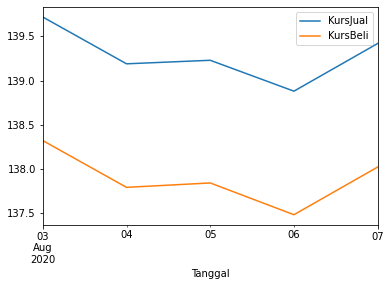

In [20]:
df.plot(kind='line')

Kesimpulan:
- Terjadi penurunan harga sejak tanggal 3 hingga tanggal 6 Agustuts, meskipun di tanggal 5 terjadi peningkatan namun sangat kecil
- Di tanggal 7 Agustus, harga kurs jual dan kurs beli naik cukup tinggi, dari 138.88 menjadi 139.42 untuk kurs jual, dan 137.48 menjadi 138.02 untuk kurs beli

then put your flask dashboard link here too.